In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [5]:
theta = 3
alpha = 0.1
data=[]
for oo in range(0,10):
    res = alpha * 2 * theta
    print("{0:.4f} {1:.4f}".format(theta, res))
    data.append([theta,theta ** .2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [6]:
tmp = pd.DataFrame(data)
tmp

,0,1
0,3.000000,1.245731
1,2.400000,1.191358
2,1.920000,1.139358
3,1.536000,1.089628
4,1.228800,1.042068
5,0.983040,0.996585
6,0.786432,0.953086
7,0.629146,0.911486
8,0.503316,0.871702
9,0.402653,0.833655


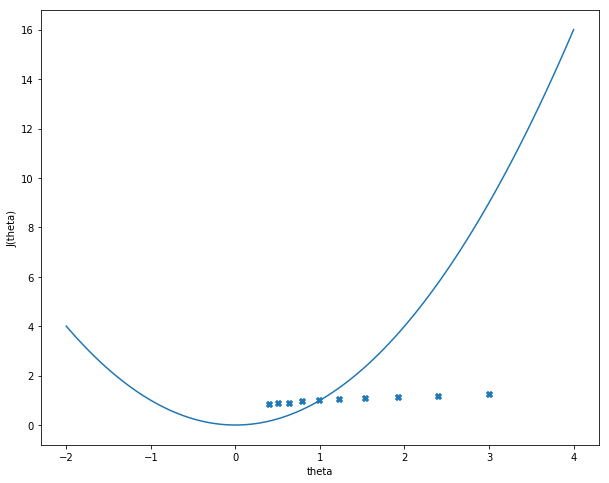

In [7]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100) ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

Second Example

In [8]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0,10):
    res = alpha * (4 * theta ** 3 + 2 * theta) # update function
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta ** 2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [9]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


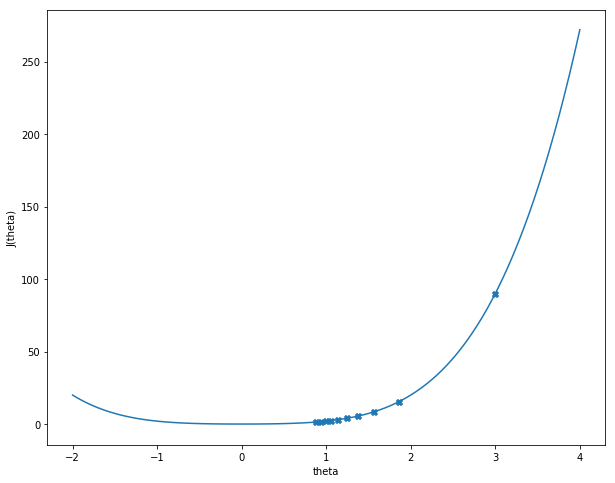

In [10]:
plt.figure(figsize=(10,8))
x_grid = np.linspace(-2, 4, 100)
plt.plot(x_grid, x_grid ** 4 + x_grid ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

In [11]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X = df[['LSTAT']].values
y = boston_data.target

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [14]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

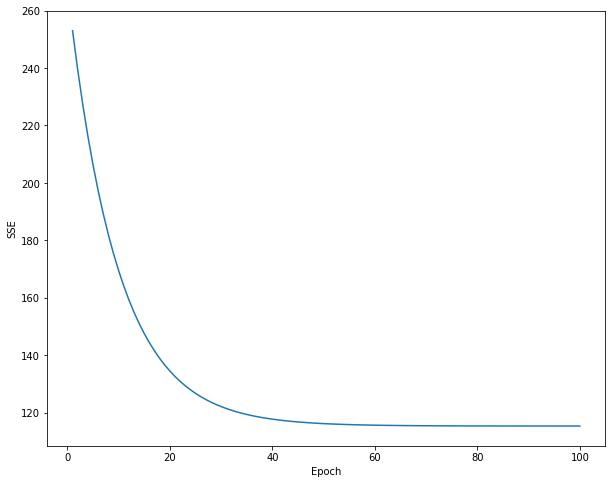

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [ ]:
w_